<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day12_Image_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

The core concept for Day 12 is GANs (Generative Adversarial Networks) and neural style transfer - techniques that allow you to apply the artistic style of one image to the content of another.

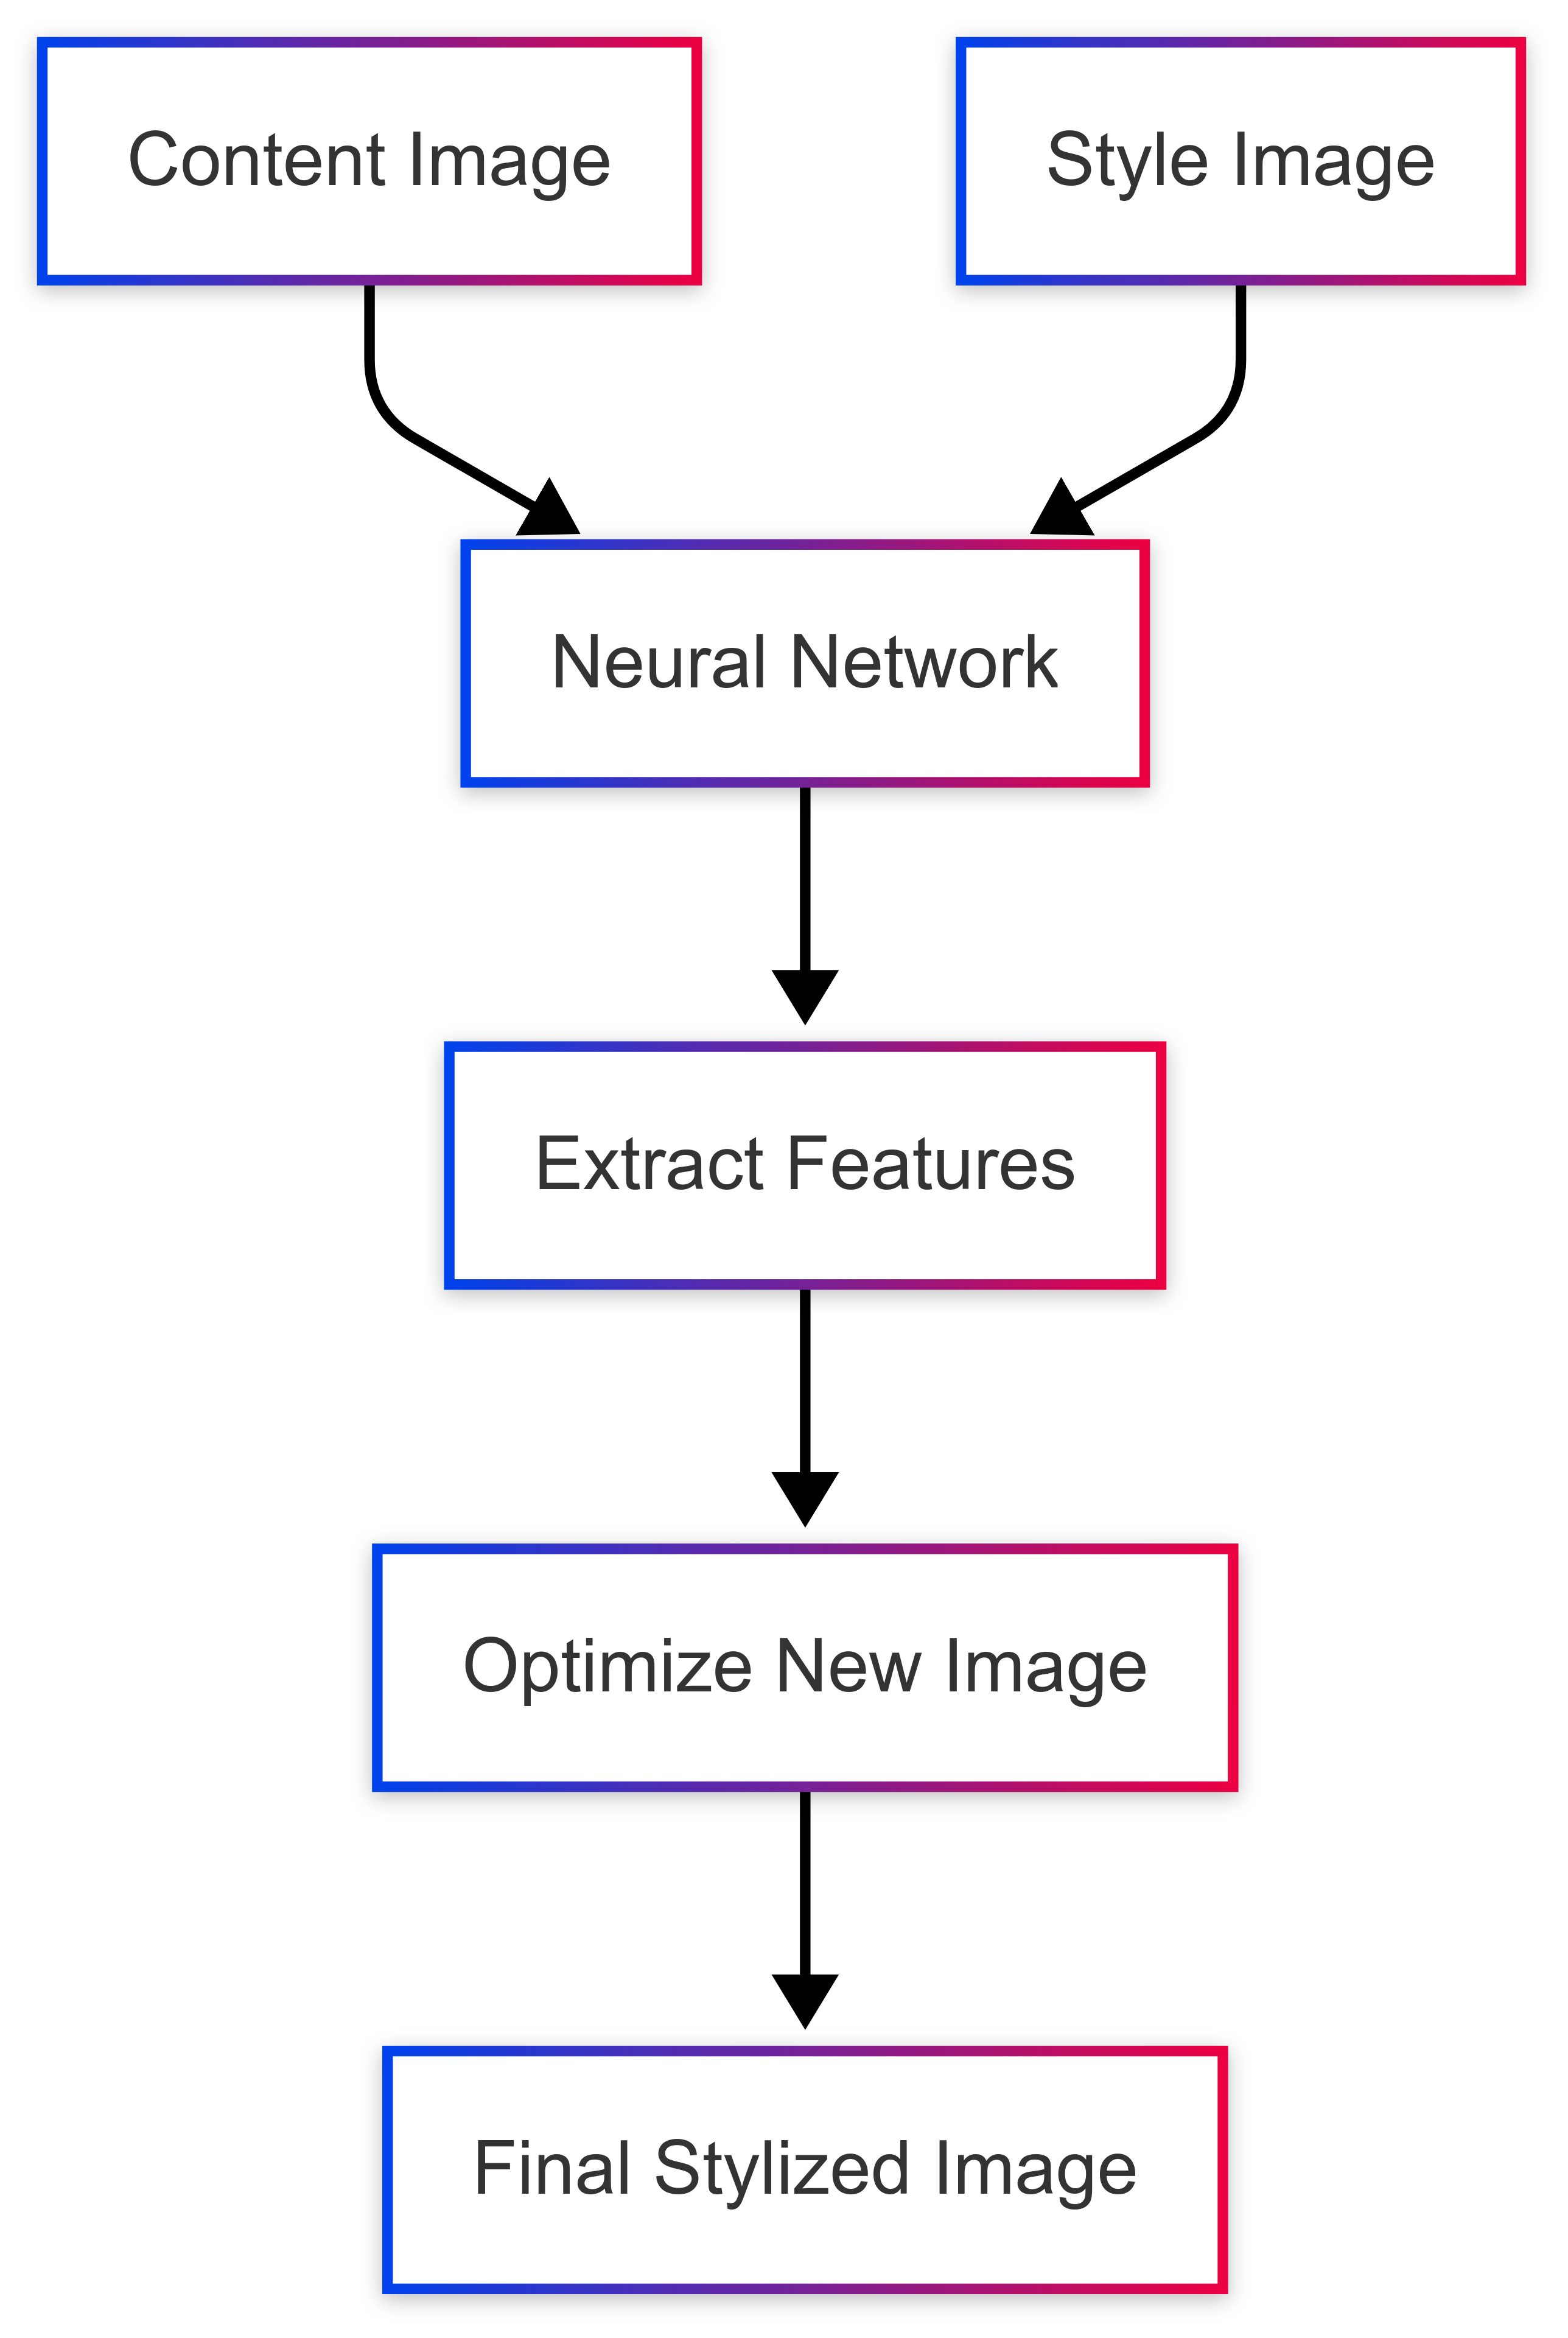

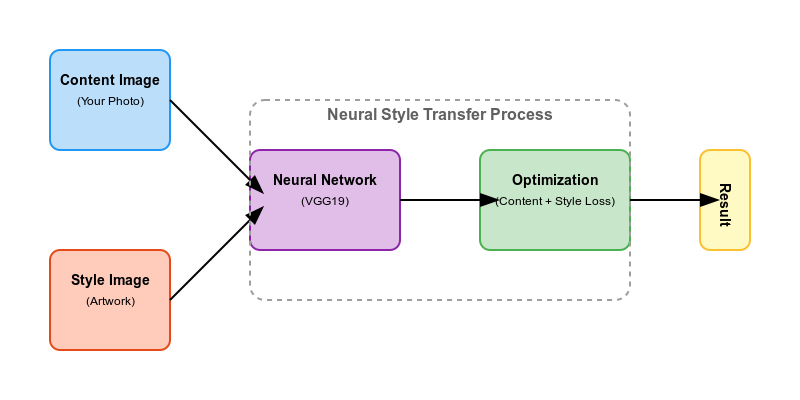

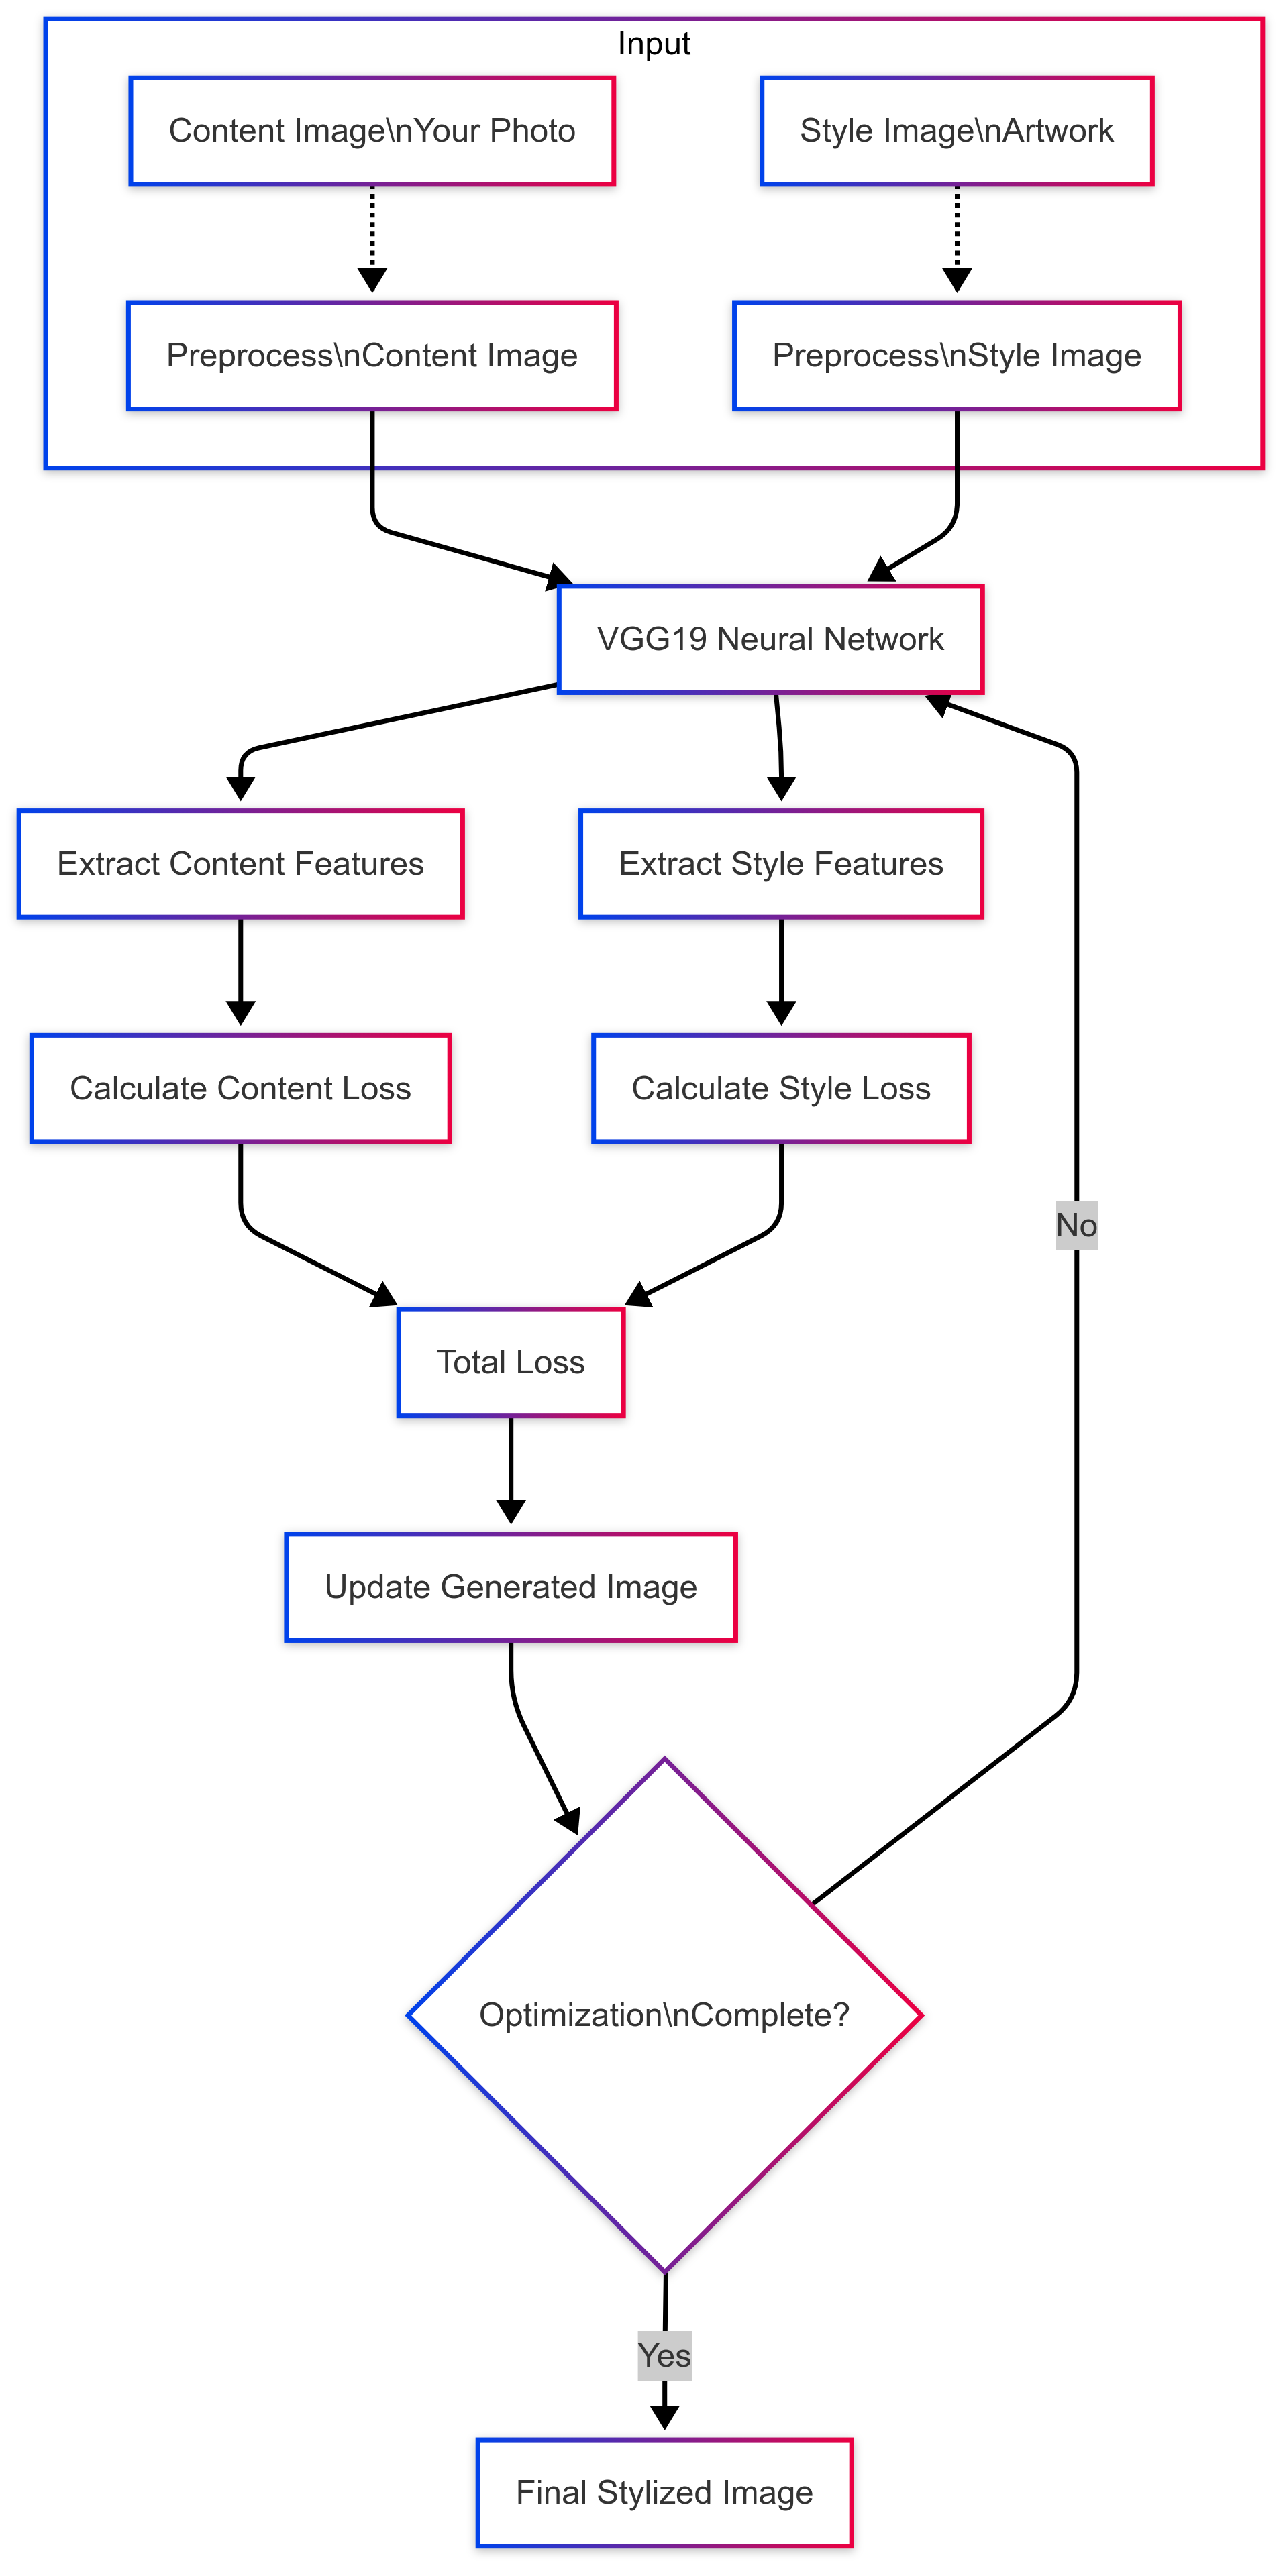

**Neural style transfer works by:**

*   Using a pre-trained convolutional neural network (usually VGG19)

*   Separating the "content" of an image from its "style"
*   Optimizing a new image that maintains the content of your photo while adopting the artistic style of another image









**Image Style Transfer Examples**

**Example 1:** Portrait + Starry Night

**Content Image**: A portrait photograph of a person

**Style Image:** Van Gogh's "Starry Night"

**Result:** Your portrait with swirling brush strokes, blue-yellow color palette, and the distinctive spiral patterns of Van Gogh's masterpiece

**Example 2:** Cityscape + Cubism

**Content Image:** A photograph of a city skyline

**Style Image:** A Picasso cubist painting

**Result:** Your cityscape with geometric shapes, fractured perspectives, and the distinctive angular style of cubism

**Set Up Google Colab Environment**

In [2]:
# Install any additional libraries we might need
!pip install tensorflow tensorflow-hub matplotlib

# Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import functools

**Image Loading and Preprocessing Functions**

In [3]:
# Load an image and limit its maximum dimension
def load_image(img_path):
    max_dim = 512
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Function to display an image
def show_image(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

**Upload Images in Colab**

Upload your content image (the photo you want to stylize):


Saving Vassily_Kandinsky,_1913_-_Composition_7.jpg to Vassily_Kandinsky,_1913_-_Composition_7.jpg
Upload your style image (the artistic style to apply):


Saving Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg to Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg


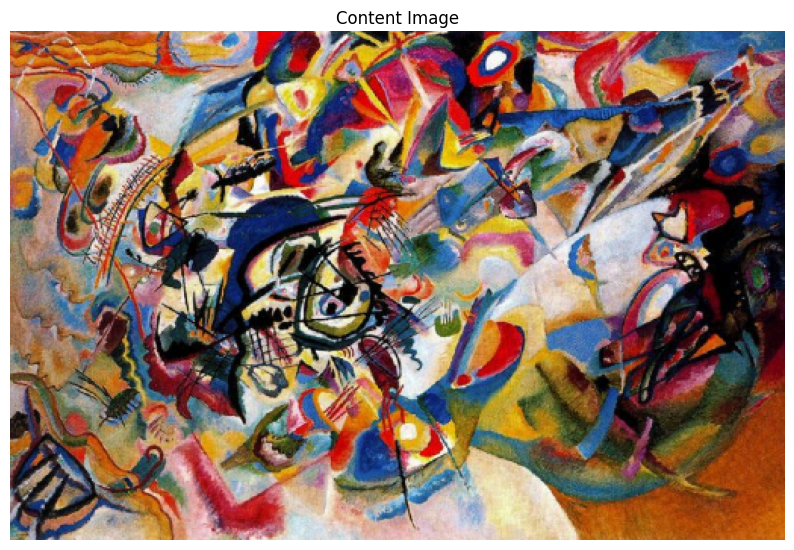

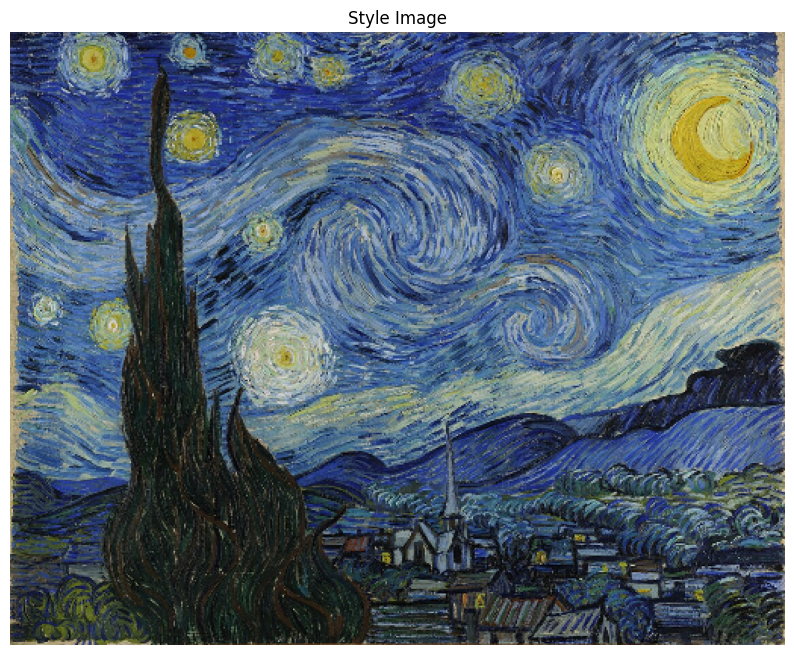

In [4]:
# Code to upload images from your computer
from google.colab import files

print("Upload your content image (the photo you want to stylize):")
uploaded_content = files.upload()
content_path = list(uploaded_content.keys())[0]

print("Upload your style image (the artistic style to apply):")
uploaded_style = files.upload()
style_path = list(uploaded_style.keys())[0]

# Load the images
content_image = load_image(content_path)
style_image = load_image(style_path)

# Display the original images
show_image(content_image, 'Content Image')
show_image(style_image, 'Style Image')

**Using TensorFlow Hub for Style Transfer**

Style transfer took 16.40 seconds


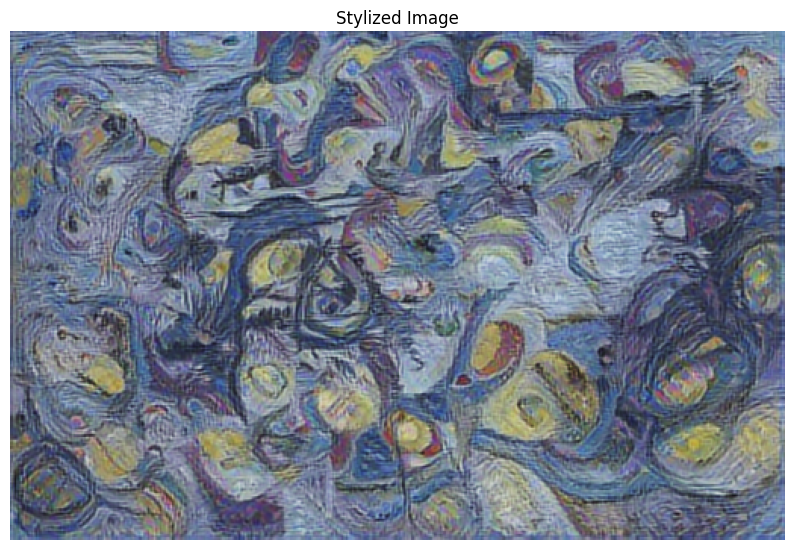

In [5]:
# Load the model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Function to perform style transfer
def style_transfer(content_image, style_image):
    stylized_image = hub_model(tf.cast(content_image, tf.float32),
                               tf.cast(style_image, tf.float32))[0]
    return stylized_image

# Apply style transfer
start_time = time.time()
stylized_image = style_transfer(content_image, style_image)
end_time = time.time()

print(f"Style transfer took {end_time - start_time:.2f} seconds")

# Display the result
show_image(stylized_image, 'Stylized Image')

**Save the Stylized Image**

In [12]:
# Convert to PIL image for saving
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

# Save the stylized image
stylized_pil = tensor_to_image(stylized_image)
stylized_pil.save('stylized_image.jpg')
files.download('stylized_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Experiment with Multiple Styles**

Upload additional style images (optional):


Saving qingbao-meng-01_igFr7hd4-unsplash.jpg to qingbao-meng-01_igFr7hd4-unsplash.jpg
Applying style from: qingbao-meng-01_igFr7hd4-unsplash.jpg


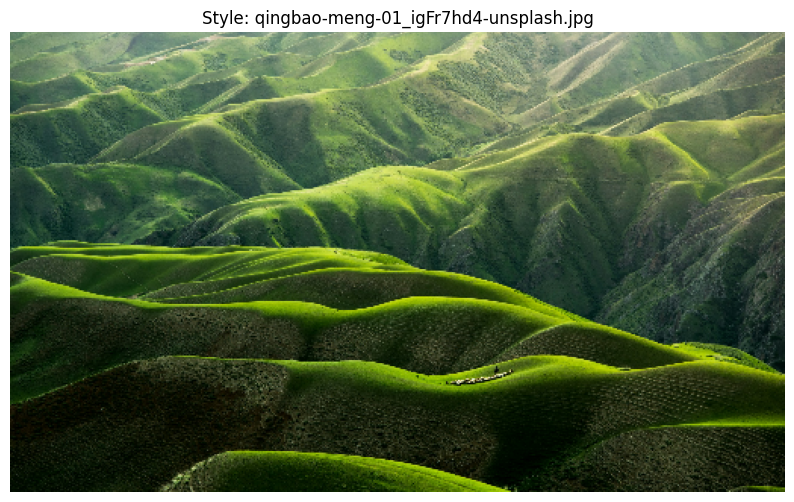

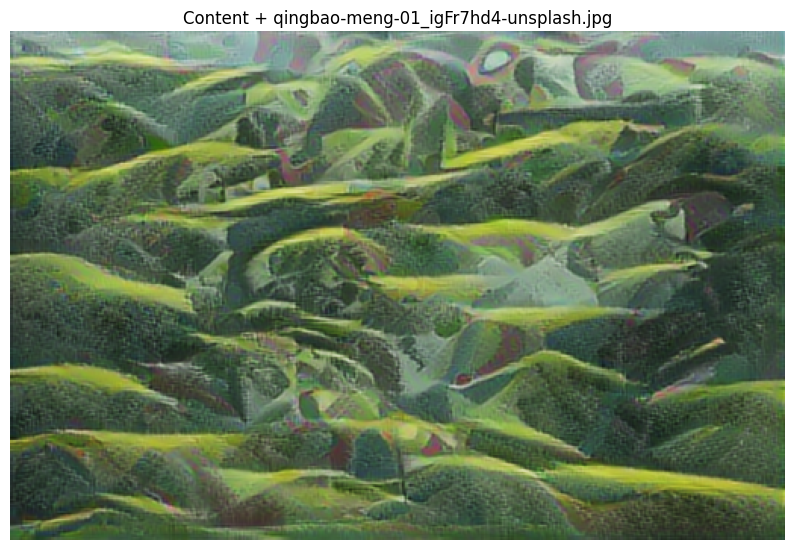

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Let's try multiple style images
print("Upload additional style images (optional):")
additional_styles = files.upload()

# Process each additional style
for style_name in additional_styles.keys():
    print(f"Applying style from: {style_name}")
    new_style_image = load_image(style_name)
    show_image(new_style_image, f'Style: {style_name}')

    # Apply this style
    new_stylized_image = style_transfer(content_image, new_style_image)
    show_image(new_stylized_image, f'Content + {style_name}')

    # Save this variation
    output_name = f'stylized_{style_name}'
    tensor_to_image(new_stylized_image).save(output_name)
    files.download(output_name)

**Adjusting Style Weight (Advanced)**

In [9]:
# Note: This is a simplified custom implementation
# A full implementation would be more complex

def style_content_loss(outputs, content_targets, style_targets, content_weight, style_weight):
    # Extract outputs
    content_outputs = outputs['content']
    style_outputs = outputs['style']

    # Content loss
    content_loss = tf.reduce_mean(tf.square(content_outputs - content_targets))

    # Style loss
    style_loss = tf.add_n([tf.reduce_mean(tf.square(style_outputs[name] - style_targets[name]))
                          for name in style_outputs.keys()])

    # Total loss
    total_loss = content_weight * content_loss + style_weight * style_loss
    return total_loss

# This would be part of a more complex custom implementation
print("Note: Custom implementation with adjustable style weight requires more advanced code")
print("We're using the pre-trained model which balances content and style automatically")

Note: Custom implementation with adjustable style weight requires more advanced code
We're using the pre-trained model which balances content and style automatically


**Create a Simple Interface**

In [10]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders for style weight if we had implemented the custom version
style_weight = widgets.FloatSlider(
    value=1e6,
    min=1e4,
    max=1e7,
    step=1e4,
    description='Style Weight:',
    disabled=False,
    continuous_update=False
)

# Display widgets
print("Note: These controls would work with a custom implementation")
display(style_weight)

Note: These controls would work with a custom implementation


FloatSlider(value=1000000.0, continuous_update=False, description='Style Weight:', max=10000000.0, min=10000.0…

**Ethical Consideration**

In [11]:
print("""
Ethical Considerations for Style Transfer:

1. Copyright Implications:
   - When using famous artworks as style images, consider copyright status
   - Works by artists deceased over 70 years are generally in public domain
   - Modern works may be protected by copyright

2. Attribution:
   - It's good practice to attribute both the original photographer and style artist
   - Consider how to properly credit sources in your LinkedIn post

3. Commercial Use:
   - Be especially careful about commercial applications of style-transferred images
   - Commercial use may require permissions from original artists
""")


Ethical Considerations for Style Transfer:

1. Copyright Implications:
   - When using famous artworks as style images, consider copyright status
   - Works by artists deceased over 70 years are generally in public domain
   - Modern works may be protected by copyright

2. Attribution:
   - It's good practice to attribute both the original photographer and style artist
   - Consider how to properly credit sources in your LinkedIn post

3. Commercial Use:
   - Be especially careful about commercial applications of style-transferred images
   - Commercial use may require permissions from original artists

